In [2]:
import pandas as pd
import glob
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean


In [3]:
# path = "/home/spicygremlin/Github/CS220/combined_speedup/raw/"
# results = []
# graph_files = glob.glob(os.path.join(path, "*-nodes.csv"))
# for graph in graph_files:
#     df = pd.read_csv(graph,index_col=None,header=0)
#     df = df[df['in_netlist'] == 0]
#     results.extend(df['history_cost'].values)
# # df = pd.read_csv(graph_files[0],index_col=None,header=0)
# # results = list(filter(lambda x: x > 2, results))
# plt.yscale('log')
# # plt.xticks(range(len(results)),results)
# # print(max(results))
# plt.hist(results, int(max(results)))
# # plt.set_ylim([None,10^6])


In [4]:
# path = "/home/spicygremlin/Github/CS220/combined_storage/raw/"
# results = []
# graph_files = glob.glob(os.path.join(path, "strat*.csv"))
# for graph in graph_files:
#     df = pd.read_csv(graph,index_col=None,header=0)
#     results.extend(df['history_cost'].values)
# # df = pd.read_csv(graph_files[0],index_col=None,header=0)
# # results = list(filter(lambda x: x > 2, results))
# plt.yscale('log')
# plt.hist(results, 6, color="skyblue")

(array([4.0523e+04, 1.5000e+01, 6.8000e+01, 5.8000e+01, 1.0000e+01,
        2.0000e+00]),
 array([1.        , 1.43170445, 1.8634089 , 2.29511335, 2.7268178 ,
        3.15852225, 3.5902267 ]),
 <a list of 6 Patch objects>)

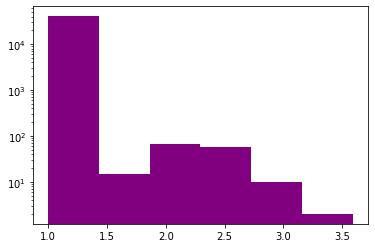

In [12]:
path = "/mnt/e/benchmarks/Outputs/EArch_alu4"
results = []
graph_files = glob.glob(os.path.join(path, "prediction.csv"))
for graph in graph_files:
    df = pd.read_csv(graph,index_col=None,header=None)
    results.extend(df[0].values)
# df = pd.read_csv(graph_files[0],index_col=None,header=0)
# results = list(filter(lambda x: x > 2, results))
plt.yscale('log')
plt.hist(results, 6, color="purple")

(array([4.0311e+04, 2.7600e+02, 7.1000e+01, 1.6000e+01, 1.0000e+00,
        1.0000e+00]),
 array([ 1.        ,  3.16666667,  5.33333333,  7.5       ,  9.66666667,
        11.83333333, 14.        ]),
 <a list of 6 Patch objects>)

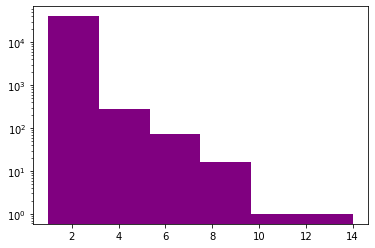

In [13]:
path = "/mnt/e/benchmarks/Outputs/EArch_alu4"
results = []
graph_files = glob.glob(os.path.join(path, "prediction-g*.csv"))
for graph in graph_files:
    df = pd.read_csv(graph,index_col=None,header=None)
    results.extend(df[0].values)
# df = pd.read_csv(graph_files[0],index_col=None,header=0)
# results = list(filter(lambda x: x > 2, results))
plt.yscale('log')
plt.hist(results, 6, color="purple")

In [3]:
def metric(path, r_string, type_string):
    all_files = glob.glob(os.path.join(path, "*"+r_string+"*"+type_string+"*.csv"))
    for file in all_files:
        if os.path.getsize(file) == 0:
            all_files.remove(file)
        
    print(type(all_files))
    results = dict()
    results[type_string] = dict()
    results['reg'] = dict()
    results['time_gnn'] = dict()
    results['time_reg'] = dict()
    results['CPD_GNN'] = dict()
    results['CPD_REG'] = dict()
    gnn_results = dict()
    reg_results = dict()
    for gnn_metric in all_files:
        lf = gnn_metric.split("/")[-1]
        lf = lf.split(".")[0]
        name = lf.split("__"+type_string+"__")[0]
        # print(name)
    
        df = pd.read_csv(gnn_metric,index_col=None,header=0)
       
        gnn_results[name] = max(df['Iteration'])
        # print(df[].head())
    results[type_string] = gnn_results
    reg_results = dict()
    for gnn_metric in all_files:
        lf = gnn_metric.split("/")[-1]
        lf = lf.split(".")[0]
        name = lf.split("__"+type_string+"__")[0]
        # print(name)
        df = pd.read_csv(gnn_metric,index_col=None,header=0)
       
        reg_results[name] = sum(df['Time'])
    results['time_gnn'] = reg_results
    # print(results)
    reg_results = dict()

    reg_results = dict()
    for gnn_metric in all_files:
        lf = gnn_metric.split("/")[-1]
        lf = lf.split(".")[0]
        name = lf.split("__"+type_string+"__")[0]
        # print(name)
        df = pd.read_csv(gnn_metric,index_col=None,header=0)
       
        reg_results[name] = max(df['CPD (ns)'])
    results['CPD_GNN'] = reg_results
    # print(results)
    reg_results = dict()
    all_files = glob.glob(os.path.join(path, r_string+"*reg*.csv"))
    for reg_metric in all_files:
        lf = reg_metric.split("/")[-1]
        lf = lf.split(".")[0]
        name = lf.split("__reg__")[0]
        # print(name)
        df = pd.read_csv(reg_metric,index_col=None,header=0)
       
        reg_results[name] = max(df['Iteration'])
        # print(df[].head())  
    results['reg'] = reg_results

    reg_results = dict()
    for reg_metric in all_files:
        lf = reg_metric.split("/")[-1]
        lf = lf.split(".")[0]
        name = lf.split("__reg__")[0]
        # print(name)
        df = pd.read_csv(reg_metric,index_col=None,header=0)
        reg_results[name] = sum(df['Time'])
    results['time_reg'] = reg_results

    reg_results = dict()
    for reg_metric in all_files:
        lf = reg_metric.split("/")[-1]
        lf = lf.split(".")[0]
        name = lf.split("__reg__")[0]
        # print(name)
        df = pd.read_csv(reg_metric,index_col=None,header=0)
        reg_results[name] = max(df['CPD (ns)'])
    results['CPD_REG'] = reg_results
        # print(df[].head())

    # print(results)
    my_df = pd.DataFrame.from_dict(results)
    # print(my_df)
    my_df['Reduction'] = (my_df['reg'].values - my_df[type_string].values)/my_df['reg'].values
    # my_df['Reduction']=  pd.Series(["{0:.2f}%".format(val * 100) for val in my_df['Reduction']], index = my_df.index)

    # print("{:2%}".format(my_df))
    my_df.dropna(inplace=True)
    print("Average: ", "{:.2%}".format(mean(my_df['Reduction'].values)))

    pd.set_option('expand_frame_repr', False)
    my_df['Reduction']=  pd.Series(["{0:.2f}%".format(val * 100) for val in my_df['Reduction']], index = my_df.index)
    my_df['time_reg']=  pd.Series(["{0:.2f}".format(val) for val in my_df['time_reg']], index = my_df.index)
    my_df['time_gnn']=  pd.Series(["{0:.2f}".format(val) for val in my_df['time_gnn']], index = my_df.index)
    my_df['CPD_REG']=  pd.Series(["{0:.2f}".format(val) for val in my_df['CPD_REG']], index = my_df.index)
    my_df['CPD_GNN']=  pd.Series(["{0:.2f}".format(val) for val in my_df['CPD_GNN']], index = my_df.index)
   
    print(my_df)

In [11]:
path = "/mnt/e/benchmarks/route_metrics/"
r_string = "EArch"
type_string = "gnd"
metric(path, r_string, type_string)

<class 'list'>
Average:  17.25%
                 gnd  reg time_gnn time_reg CPD_GNN CPD_REG Reduction
EArch__alu4       14   14     0.17     0.48    5.54    5.50     0.00%
EArch__apex2      13   15     0.24     0.59    6.30    6.30    13.33%
EArch__apex4      13   15     0.17     0.50    5.25    5.25    13.33%
EArch__bigkey     10   11     0.16     0.60    2.64    2.64     9.09%
EArch__clma       12   15     1.06     2.61   11.33   11.31    20.00%
EArch__des        11   13     0.23     0.82    5.20    5.20    15.38%
EArch__diffeq     10   14     0.13     0.40    6.44    6.44    28.57%
EArch__dsip        8   12     0.12     0.63    2.63    2.63    33.33%
EArch__elliptic   11   13     0.33     1.18    9.07    9.06    15.38%
EArch__ex1010     14   16     0.58     1.70    7.37    7.44    12.50%
EArch__ex5p       12   16     0.14     0.40    5.36    5.36    25.00%
EArch__frisc      11   13     0.40     1.19   11.83   11.84    15.38%
EArch__misex3     12   15     0.16     0.49    5.16    5.1

In [15]:
path = "/mnt/e/benchmarks/route_metrics/"
r_string = "*strat*"
type_string = "gnn"
metric(path, r_string, type_string)

<class 'list'>


EmptyDataError: No columns to parse from file

In [9]:
path = "/mnt/e/benchmarks/route_metrics/"
r_string = "EArch"
type_string = "gnn"
metric(path, r_string, type_string)

<class 'list'>
Average:  5.41%
                 gnn  reg time_gnn time_reg CPD_GNN CPD_REG Reduction
EArch__alu4       15   14     7.86     0.88    5.54    5.50    -7.14%
EArch__apex2      14   15     8.17     1.06    6.30    6.30     6.67%
EArch__apex4      14   15     7.58     0.93    5.25    5.25     6.67%
EArch__bigkey     10   11     8.23     0.91    2.64    2.64     9.09%
EArch__clma       14   15    15.15     4.80   11.33   11.31     6.67%
EArch__des        13   13     9.81     1.59    5.20    5.20     0.00%
EArch__diffeq     12   14     7.73     0.87    6.44    6.44    14.29%
EArch__dsip        9   12     8.09     1.60    2.63    2.63    25.00%
EArch__elliptic   13   13     9.67     2.02    9.07    9.06     0.00%
EArch__ex1010     14   16    10.04     2.88    7.37    7.44    12.50%
EArch__ex5p       14   16     6.65     0.77    5.36    5.36    12.50%
EArch__frisc      13   13     9.00     1.60   11.84   11.84     0.00%
EArch__misex3     14   15     7.55     0.88    5.16    5.16

In [4]:
path = "/mnt/e/benchmarks/route_metrics/"
r_string = "*stratixiv_arch_timing_"
type_string = "gnn"
metric(path, r_string, type_string)

<class 'list'>


EmptyDataError: No columns to parse from file

In [5]:
path = "/mnt/e/benchmarks/route_metrics/"
r_string = "strat"
type_string = "gnn"
metric(path, r_string, type_string)

<class 'list'>


EmptyDataError: No columns to parse from file